# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression (Best Treshold) Diabetes</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

In [4]:

"""
import numpy as np
import pandas as pd
import scipy
import matplotlib
import sklearn
import yellowbrick

print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Yellowbrick version: {yellowbrick.__version__}")

"""

'\nimport numpy as np\nimport pandas as pd\nimport scipy\nimport matplotlib\nimport sklearn\nimport yellowbrick\n\nprint(f"NumPy version: {np.__version__}")\nprint(f"SciPy version: {scipy.__version__}")\nprint(f"Pandas version: {pd.__version__}")\nprint(f"Matplotlib version: {matplotlib.__version__}")\nprint(f"Scikit-learn version: {sklearn.__version__}")\nprint(f"Yellowbrick version: {yellowbrick.__version__}")\n\n'

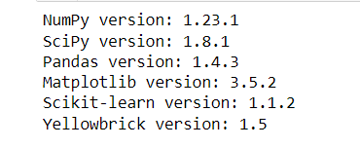

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

Bu veri seti, Amerika'nın Arizona eyaletinde yaşayan Pima Kızılderilileri arasında 21 yaş ve üzeri kadınlarda diyabet olasılığını tahmin etmek için kullanılır.

Pima Indian Diabetes veri setinde genellikle şu sütunlar bulunur:

Pregnancies: Kişinin kaç kez hamile kaldığı.

Glucose: 2 saatlik oral glukoz tolerans testindeki plazma glukoz konsantrasyonu.

BloodPressure: Diyastolik kan basıncı (mm Hg).

SkinThickness: Triceps deri kıvrım kalınlığı (mm).

Insulin: 2 saatlik serum insulin miktarı (mu U/ml).

BMI: Vücut kitle indeksi (ağırlık in kg / (boy in m)^2).

DiabetesPedigreeFunction: Diyabet soy geçmişi fonksiyonu.

Age: Yaş (yıl olarak).

Outcome: 0 veya 1 değerini alır. 1, diyabetin pozitif olarak test edildiğini; 0 ise negatif olarak test edildiğini gösterir.

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [8]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [11]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

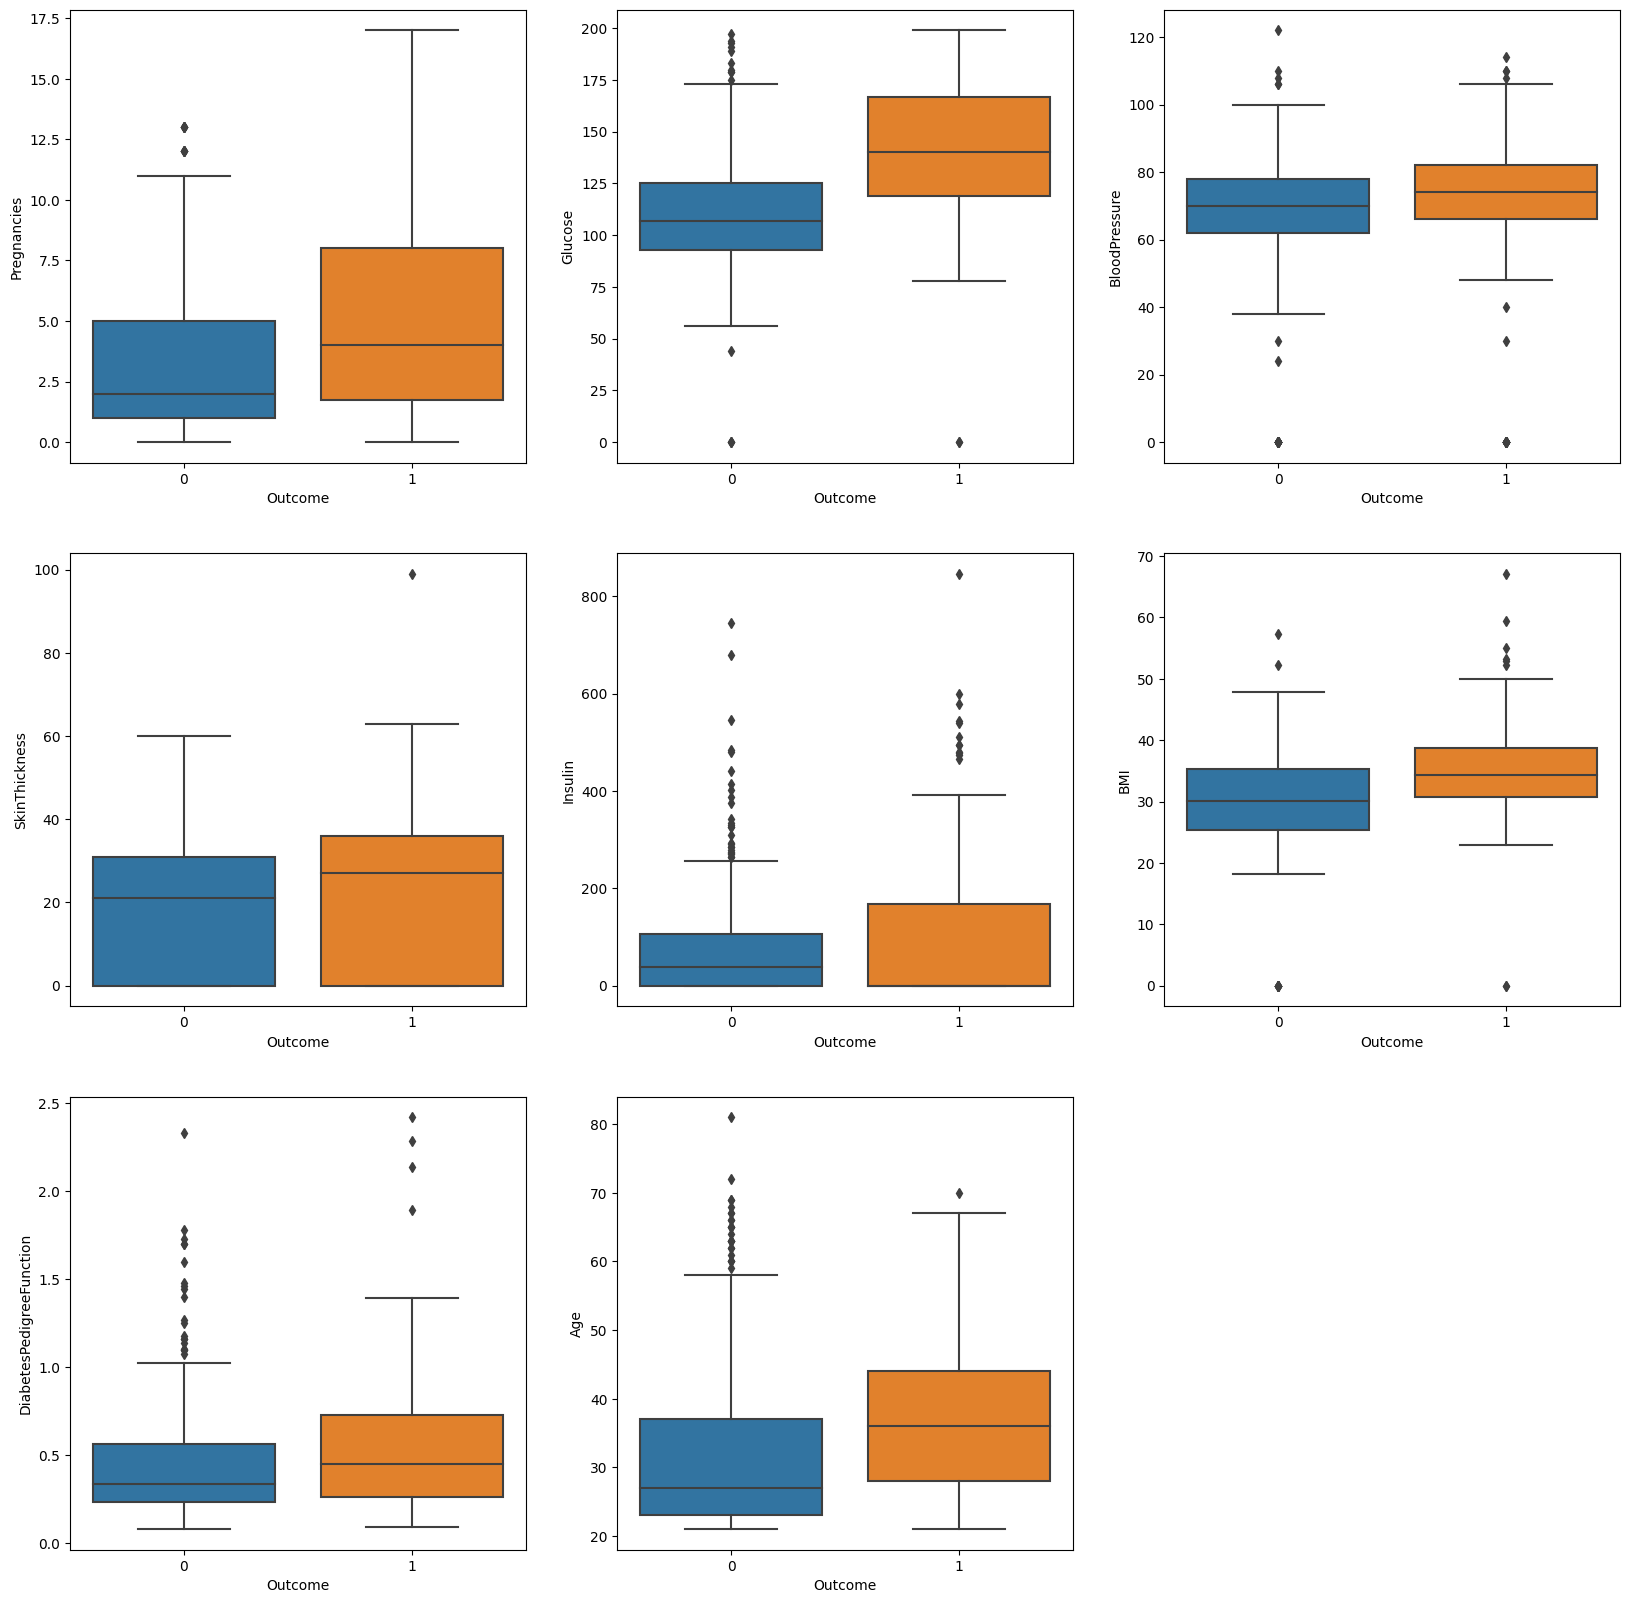

In [12]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

In [13]:
df.Outcome.value_counts(normalize = True)

0   0.651
1   0.349
Name: Outcome, dtype: float64

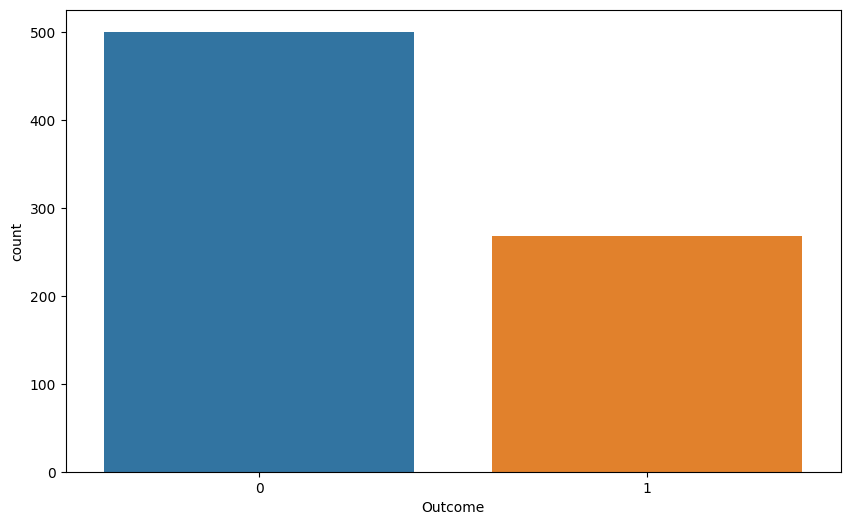

In [14]:
sns.countplot(df.Outcome);

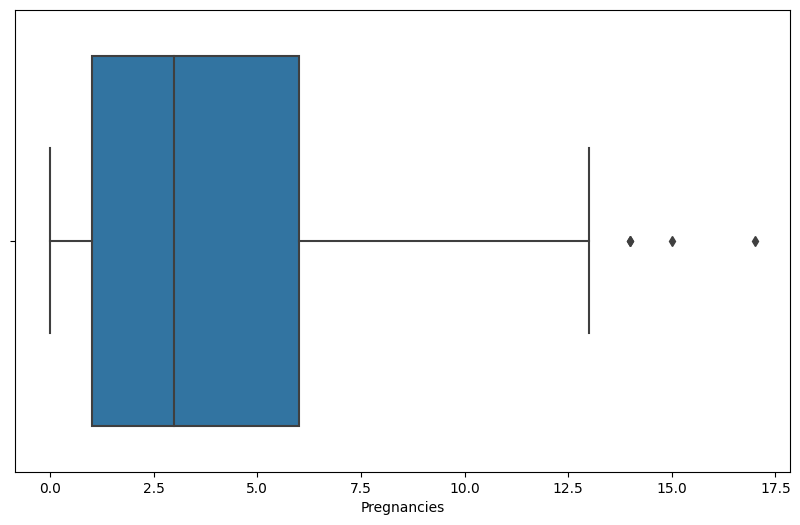

In [15]:
sns.boxplot(df.Pregnancies);

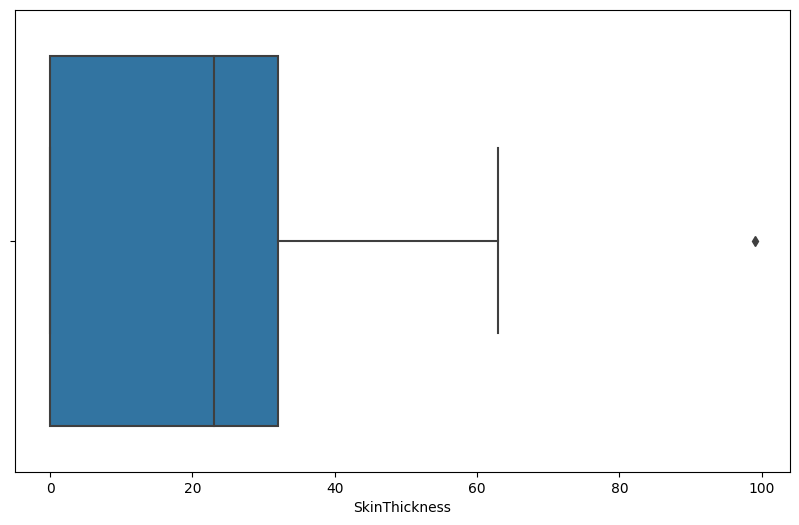

In [16]:
sns.boxplot(df.SkinThickness);

In [17]:
df = df[df.SkinThickness<70]  # the thickness can not be more than 70

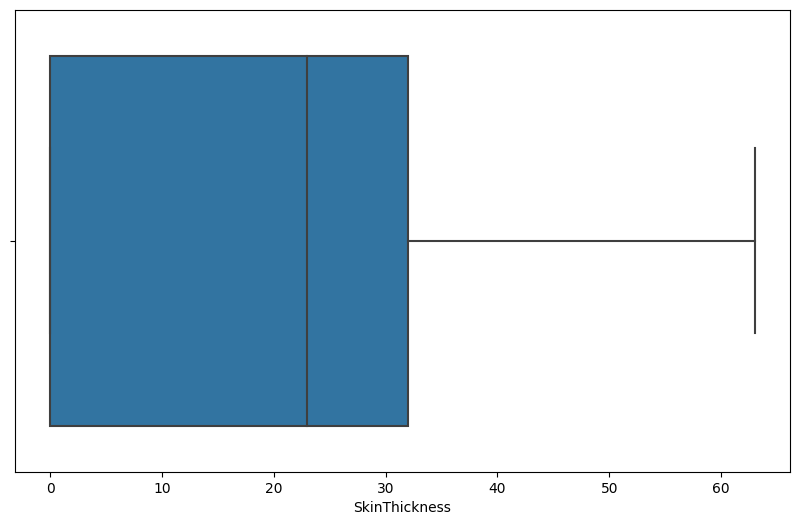

In [18]:
sns.boxplot(df.SkinThickness);

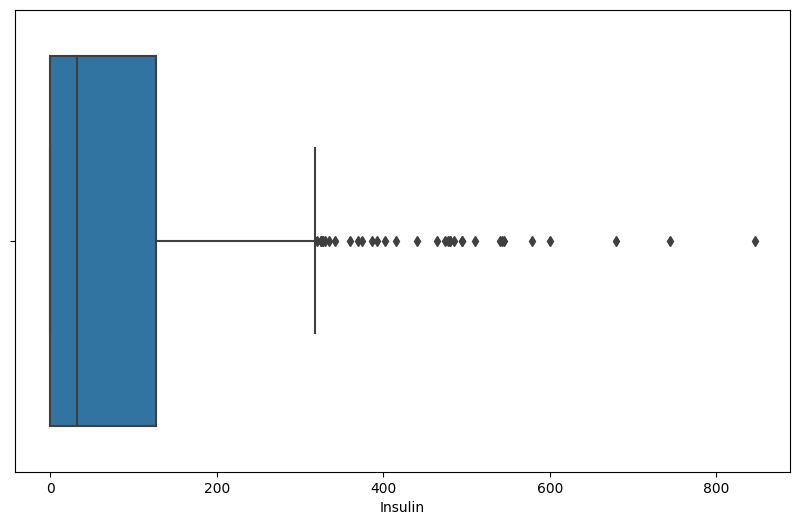

In [19]:
sns.boxplot(df.Insulin);

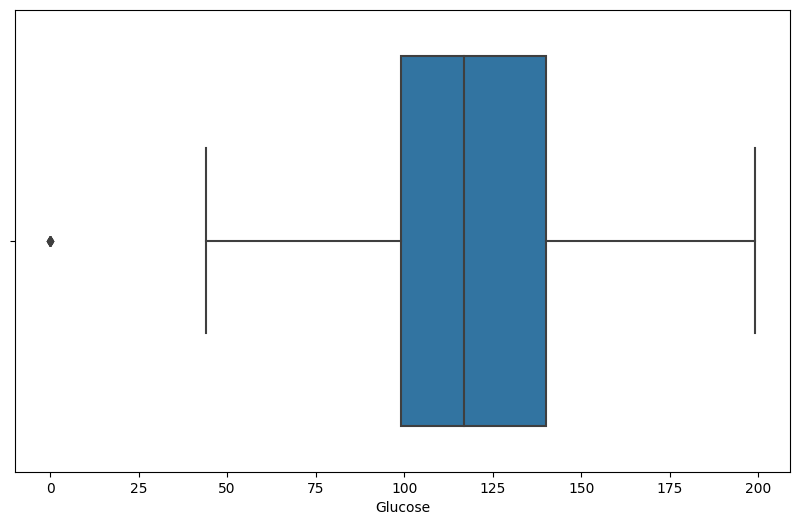

In [20]:
sns.boxplot(df.Glucose);

In [21]:
df = df[df.Glucose>0]       # glikoz can not be 0, outlier

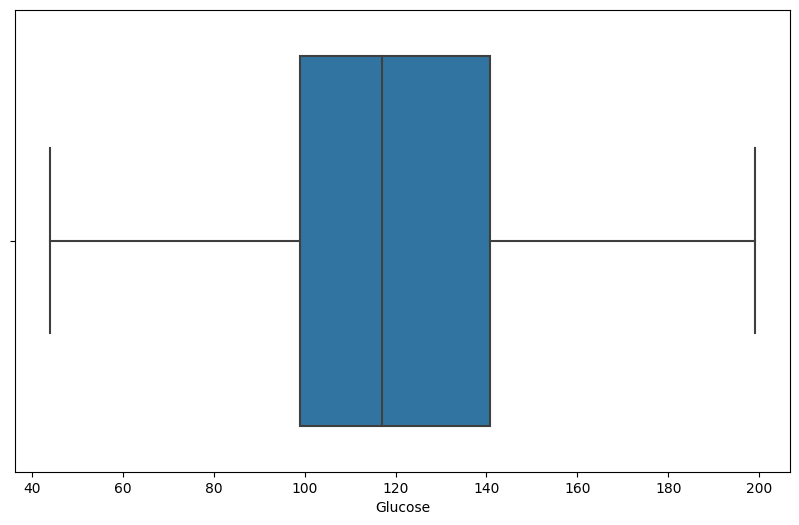

In [22]:
sns.boxplot(df.Glucose);

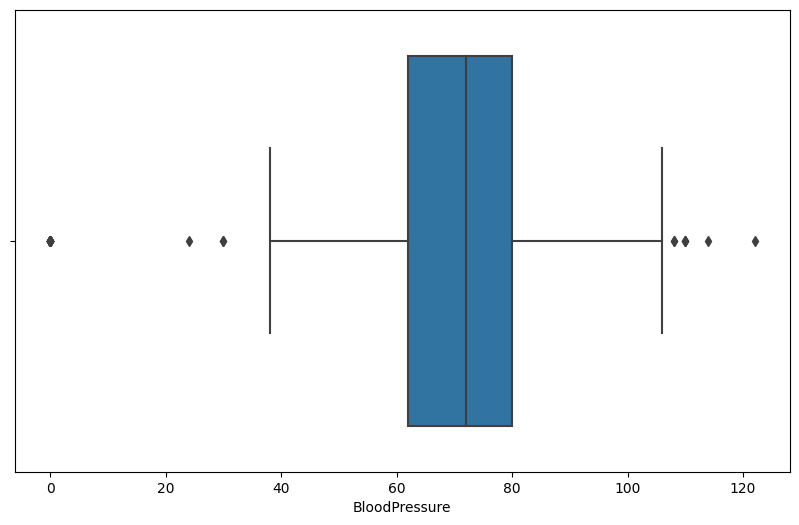

In [23]:
sns.boxplot(df.BloodPressure);

In [24]:
df = df[df.BloodPressure>35]  # bloodpressure shuld be more than 35

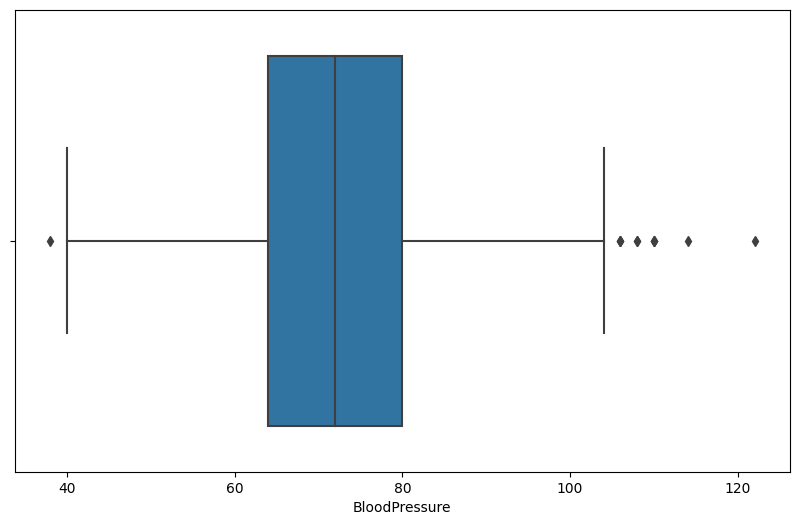

In [25]:
sns.boxplot(df.BloodPressure);

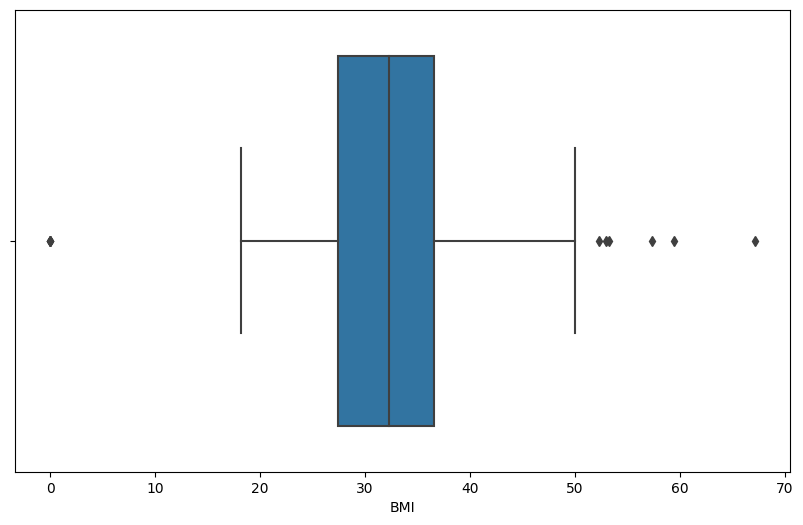

In [26]:
sns.boxplot(df.BMI);

In [27]:
df = df[df.BMI>0]  # there is no way to be BMI=0 

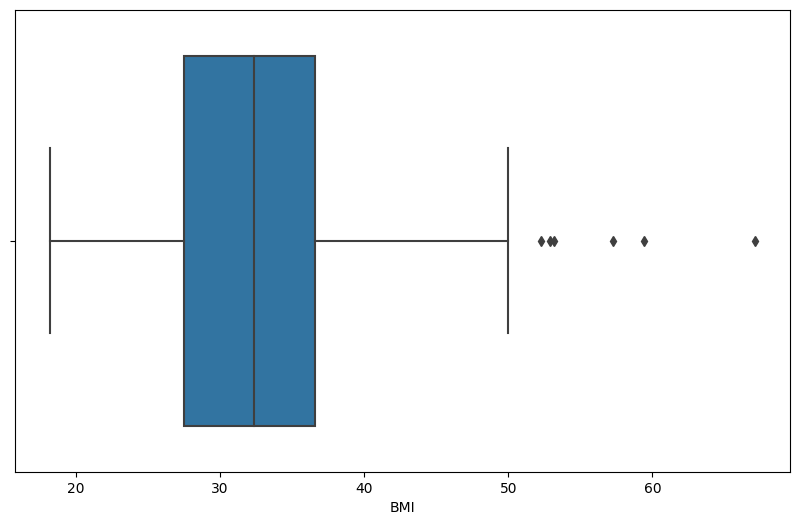

In [28]:
sns.boxplot(df.BMI);

In [29]:
df.shape  # after the outliers

(720, 9)

In [30]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

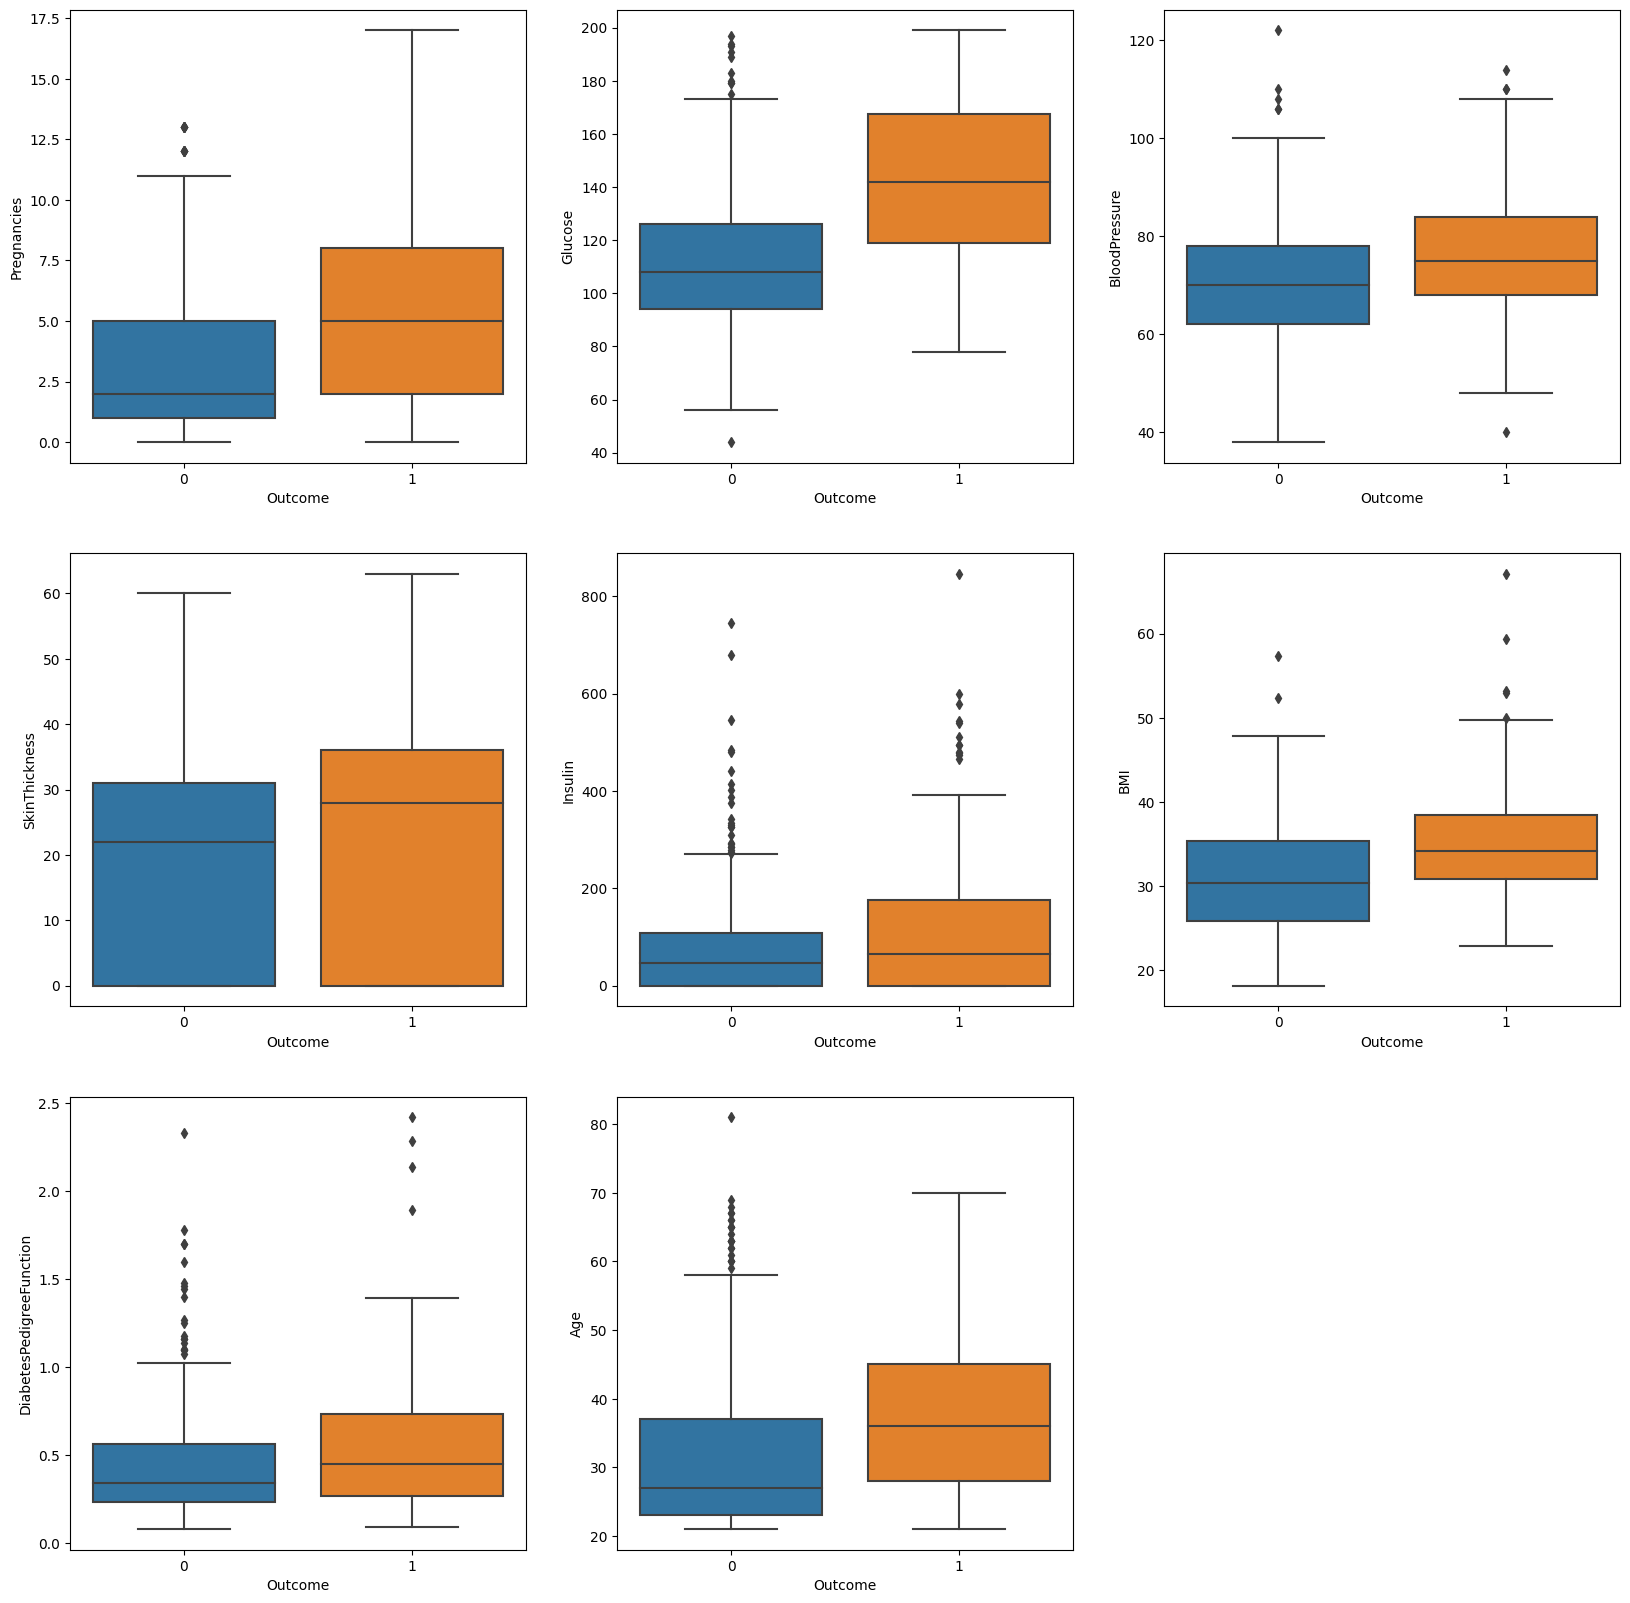

In [31]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

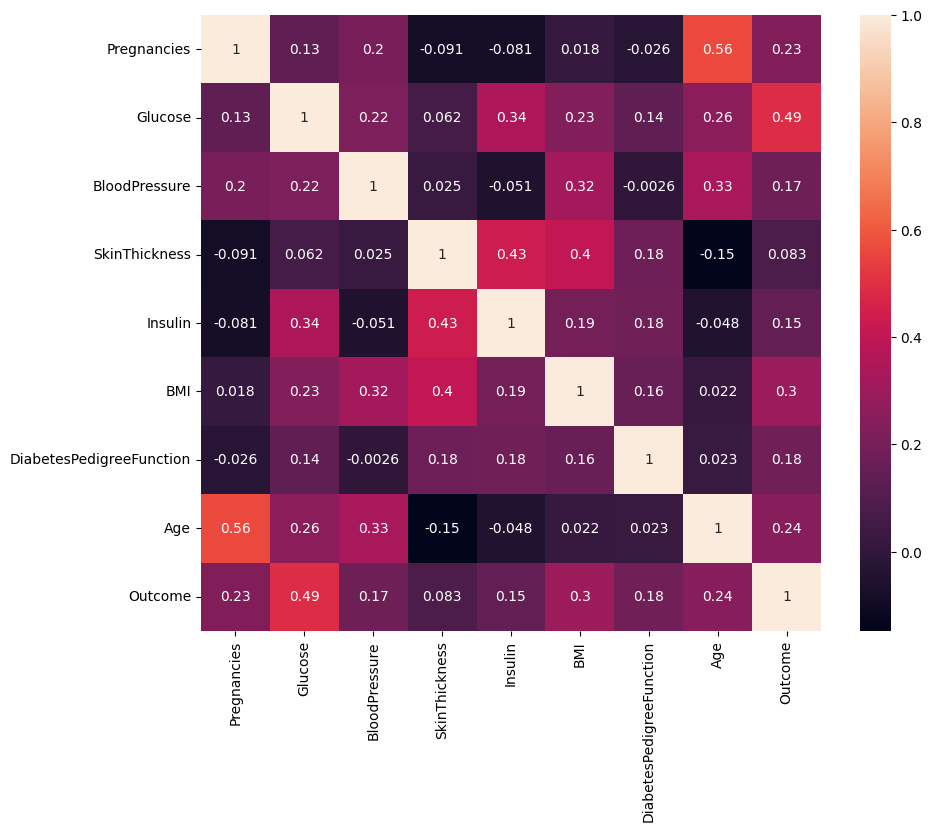

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True);

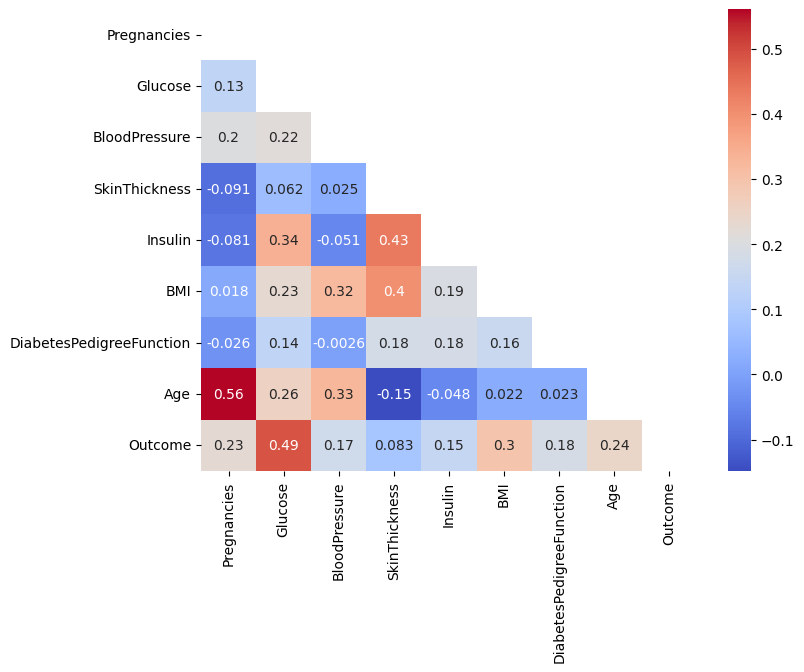

In [33]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))  # enesumit hocam dan
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm')
plt.show()

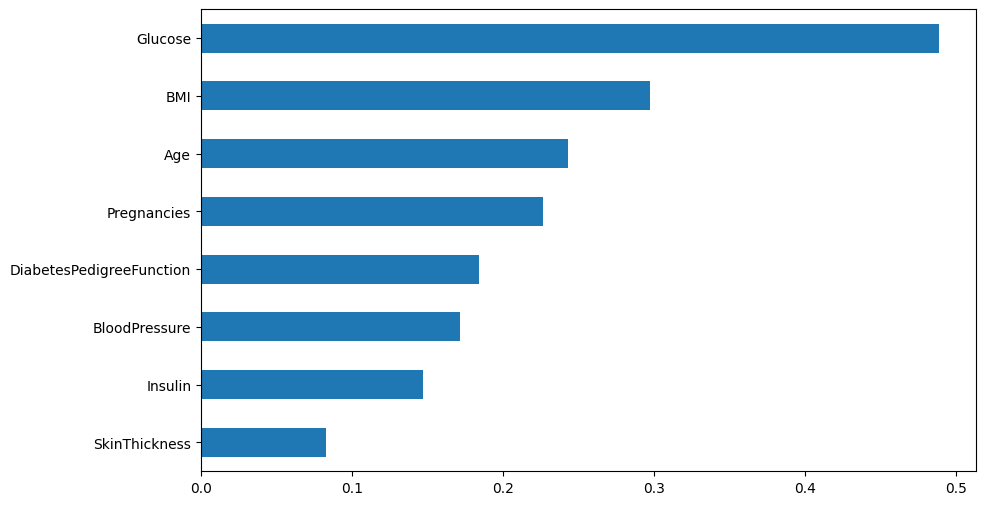

In [34]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh();

In [35]:
# sns.pairplot(df, hue = "Outcome");

# Train | Test Split an Scaling

## Target and Features

In [103]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

## Train | Test Spliting

In [104]:
from sklearn.model_selection import train_test_split

In [105]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# stratify ile unbalanced datasetlerde train, test verilerinin ayni oranda (0.2) dagilmasini saglar

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)

## Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [108]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
log_model = LogisticRegression()

In [111]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Prediction

In [112]:
y_pred = log_model.predict(X_test_scaled)

In [113]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [114]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
96,2,92,62,28,0,31.600,0.130,24,0,0,0.082
406,4,115,72,0,0,28.900,0.376,46,1,0,0.208
747,1,81,74,41,57,46.300,1.096,32,0,0,0.307
282,7,133,88,15,155,32.400,0.262,37,0,0,0.376
365,5,99,54,28,83,34.000,0.499,30,0,0,0.239
441,2,83,66,23,50,32.200,0.497,22,0,0,0.077
628,5,128,80,0,0,34.600,0.144,45,0,0,0.379
737,8,65,72,23,0,32.000,0.600,42,0,0,0.110
94,2,142,82,18,64,24.700,0.761,21,0,0,0.261
288,4,96,56,17,49,20.800,0.340,26,0,0,0.056


## Model Performance on Classification Tasks

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [117]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validation

In [118]:
from sklearn.model_selection import cross_validate

In [119]:
model = LogisticRegression()  # the model is refresched
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.004,0.002,0.600,0.450,0.514,0.707
2,0.002,0.003,0.643,0.450,0.529,0.724
3,0.002,0.002,0.923,0.600,0.727,0.845
4,0.003,0.002,0.857,0.600,0.706,0.828
5,0.001,0.002,0.706,0.600,0.649,0.776
6,0.002,0.002,0.647,0.550,0.595,0.741
7,0.002,0.003,0.714,0.526,0.606,0.772
8,0.003,0.002,0.647,0.579,0.611,0.754
9,0.003,0.003,0.733,0.550,0.629,0.772
10,0.003,0.003,0.625,0.500,0.556,0.719


In [120]:
df_scores.mean()[2:]  # better scores

test_precision   0.710
test_recall      0.541
test_f1          0.612
test_accuracy    0.764
dtype: float64

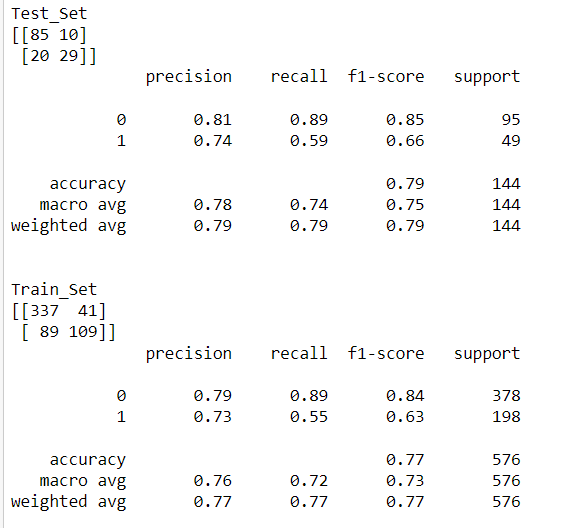

balance datalarda **accurcy** unbalanced datalarda **recall** a ve **f1_score** e bakariz

unblance datalarda recall cok iyi olduktan sonra macro avg ye bakilir

homojenlik varsa accuracy homojenlik yoksa macro avg

## Cross Validate for 0 class

In [121]:
import sklearn
sklearn.metrics.SCORERS.keys()  # for nulls can be so runned 

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [122]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label=0)
precision_0 = make_scorer(precision_score, pos_label=0)
recall_0 = make_scorer(recall_score, pos_label=0)

In [123]:
model = LogisticRegression() ## Modeli sıfırladık
scores = cross_validate(model, X_train_scaled, y_train, scoring={"precision_0":precision_0, 
                                                                 "recall_0":recall_0, 
                                                                 "f1_0":f1_0}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.003,0.003,0.744,0.842,0.790
2,0.003,0.003,0.750,0.868,0.805
3,0.003,0.002,0.822,0.974,0.892
4,0.003,0.003,0.818,0.947,0.878
5,0.003,0.003,0.805,0.868,0.835
6,0.003,0.002,0.780,0.842,0.810
7,0.003,0.003,0.791,0.895,0.840
8,0.003,0.002,0.800,0.842,0.821
9,0.004,0.001,0.786,0.892,0.835
10,0.002,0.002,0.756,0.838,0.795


In [124]:
df_scores.mean()[2:] # better score !! for Class 0

test_precision_0   0.785
test_recall_0      0.881
test_f1_0          0.830
dtype: float64

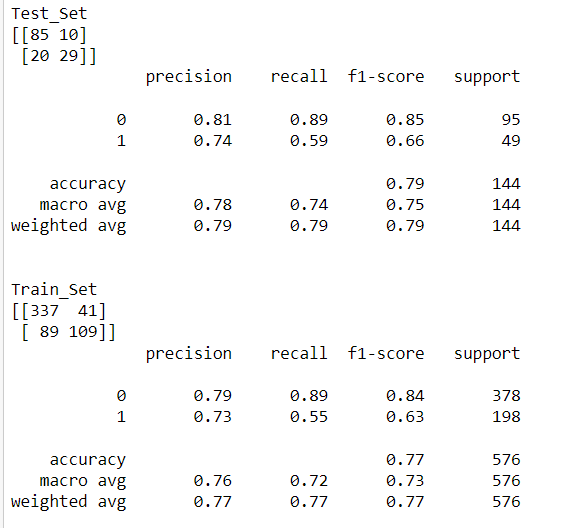

# GridSearch CV

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
# The original codes 
"""
#GridSearchCV ile recall iyileştirmek için parametreleri ve değerleri ayarlayıp  1 skorunun değerini iyileştirip hastalaı yakalama oranını artırmak. 

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik 

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", # 1 class ait en iyi skoru döndürecek, tek score verebiliriz
                          n_jobs = -1)
"""

'\n#GridSearchCV ile recall iyileştirmek için parametreleri ve değerleri ayarlayıp  1 skorunun değerini iyileştirip hastalaı yakalama oranını artırmak. \n\nmodel = LogisticRegression()\n\npenalty = ["l1", "l2"]\nC = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor\nclass_weight= ["balanced", None] # unbalance varsa düzeltecek\n# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies \n# in the input data\nsolver = ["lbfgs", "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik \n\nparam_grid = {"penalty" : penalty,\n              "C" : C,\n              "class_weight":class_weight,\n              "solver":solver}\n\n\ngrid_model = GridSearchCV(estimator=model,\n                          param_grid=param_grid,\n                          cv=10,\n                          scoring = "recall", # 1 class ait en iyi skoru döndürecek, tek score verebiliri

In [127]:
#GridSearchCV ile recall iyileştirmek için parametreleri ve değerleri ayarlayıp  1 skorunun değerini iyileştirip hastalaı yakalama oranını artırmak.
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
# in the input data
solver = ["liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", # 1 class ait en iyi skoru döndürecek, tek score verebiliriz
                          n_jobs = -1)

In [128]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='recall')

In [129]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

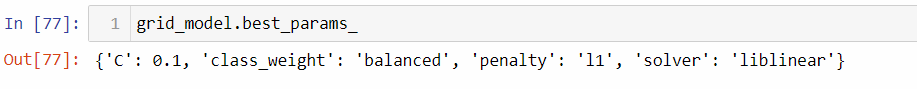

In [130]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test) # better scores

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



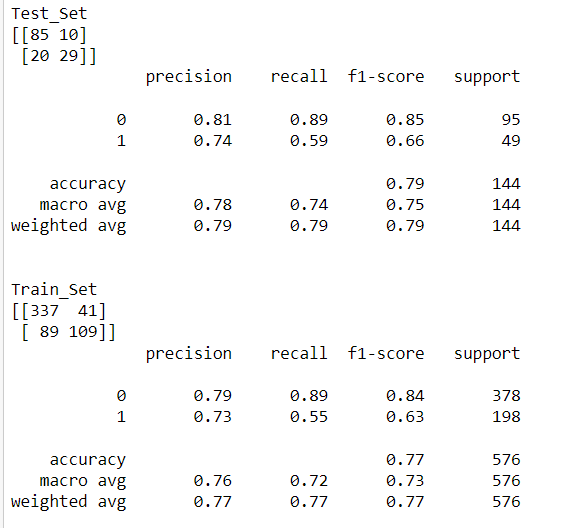

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [131]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

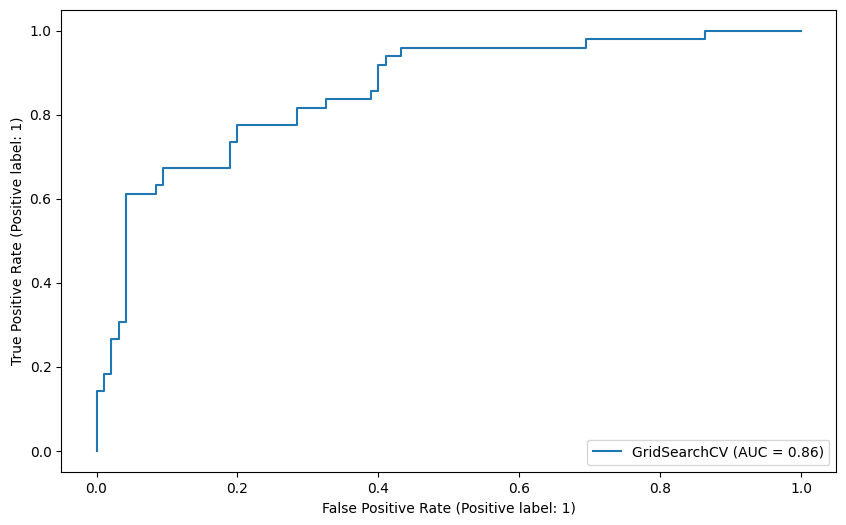

In [132]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show()  # Balanced datalarda buraya bakacagiz

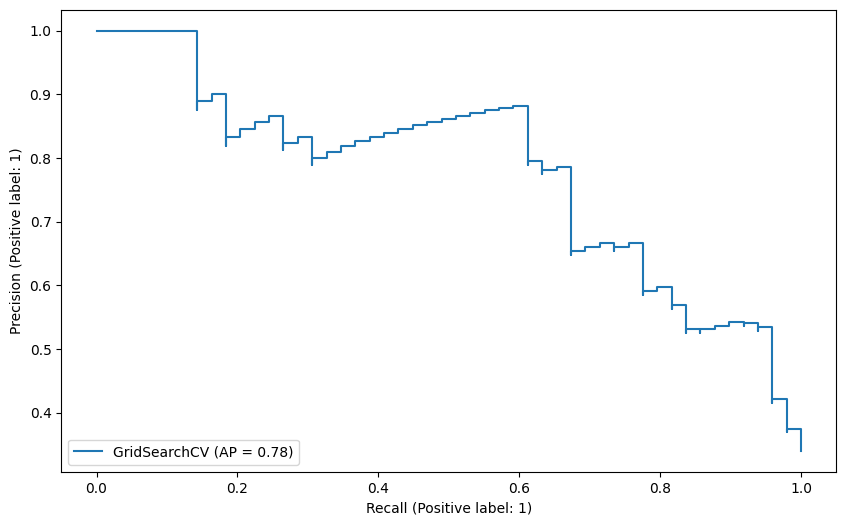

In [133]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show()     # Unbalanced datalarda bu score a bakacagiz

### Best Treshold

amacımız ;minimum false positive rate ve max true positive rate değerlerini bulup en iyi treshold değerini bulmak

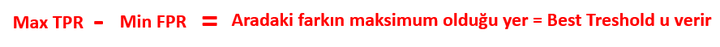

In [134]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.835297418630752

In [135]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [136]:
fp_tp_th = fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0.000,0.000,0.003,0.003,0.005,0.005,0.008,0.008,0.011,0.011,...,0.648,0.669,0.669,0.683,0.683,0.688,0.688,0.696,0.696,1.000
1,0.000,0.005,0.005,0.010,0.010,0.030,0.030,0.066,0.066,0.131,...,0.980,0.980,0.985,0.985,0.990,0.990,0.995,0.995,1.000,1.000
2,1.988,0.988,0.977,0.970,0.964,0.954,0.949,0.929,0.928,0.908,...,0.244,0.235,0.235,0.232,0.231,0.231,0.228,0.227,0.224,0.045


In [137]:
optimal_idx = np.argmax(tp_rate - fp_rate)# maximum değer index nosu
optimal_threshold = thresholds[optimal_idx] # bulduğumuz index nomarasının treshold değerini verir. en iyi değer default 0.5 değil treshold 0.3393 değeridir.
optimal_threshold

0.4864680490808201

### Best Treshold (Preccision Recall Curve)

Bitti ama bir de recall ile bulalim

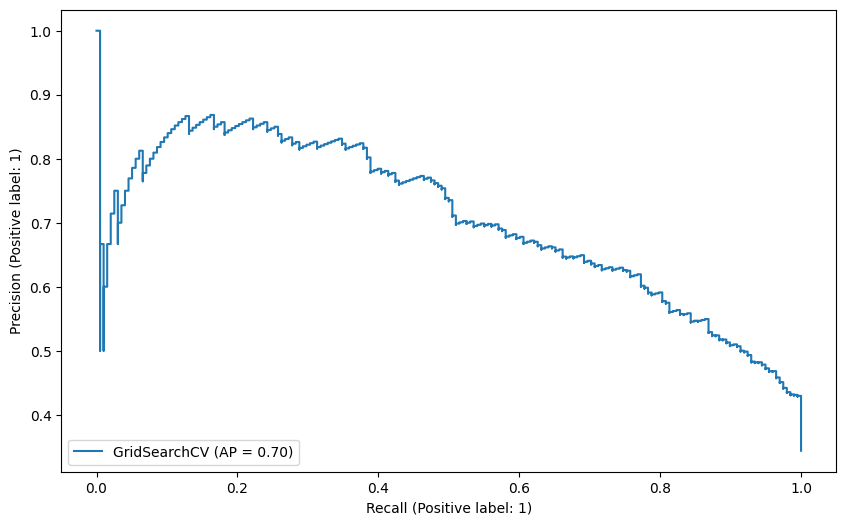

In [138]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);
plt.show()

In [139]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.7039681099671158

In [140]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [141]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formül aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold


'  burdan bir hata aldim: IndexError: index 344 is out of bounds for axis 0 with size 189\n\noptimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formül aslında f1 skorun formülü\noptimal_threshold = thresholds[optimal_idx]\noptimal_threshold\n\n'

In [143]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [144]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))   # best results for recall and precision and f1_score

[[76 19]
 [12 37]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        95
           1       0.66      0.76      0.70        49

    accuracy                           0.78       144
   macro avg       0.76      0.78      0.77       144
weighted avg       0.79      0.78      0.79       144



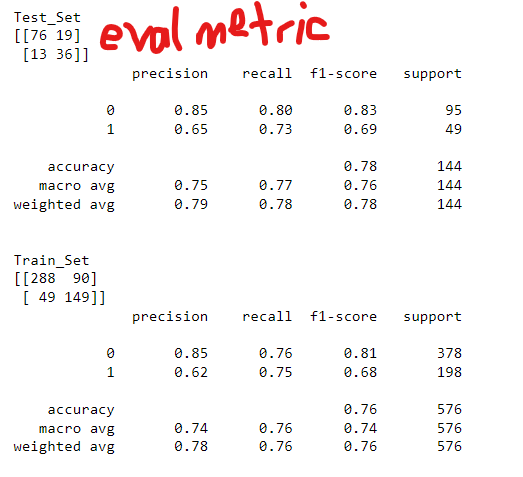

In [145]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= 0.20 else 0)

In [146]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))  # this is another results, but presicion scores and f1 are not gut

[[22 73]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.96      0.23      0.37        95
           1       0.40      0.98      0.56        49

    accuracy                           0.49       144
   macro avg       0.68      0.61      0.47       144
weighted avg       0.77      0.49      0.44       144



In [147]:
# Fatih calik hocamdan

from ipywidgets import interactive, FloatSlider
from IPython.display import display

In [148]:
# Fatih calik hocamdan
y_pred = grid_model.predict(X_test_scaled)
y_pred_proba = grid_model.predict_proba(X_test_scaled)

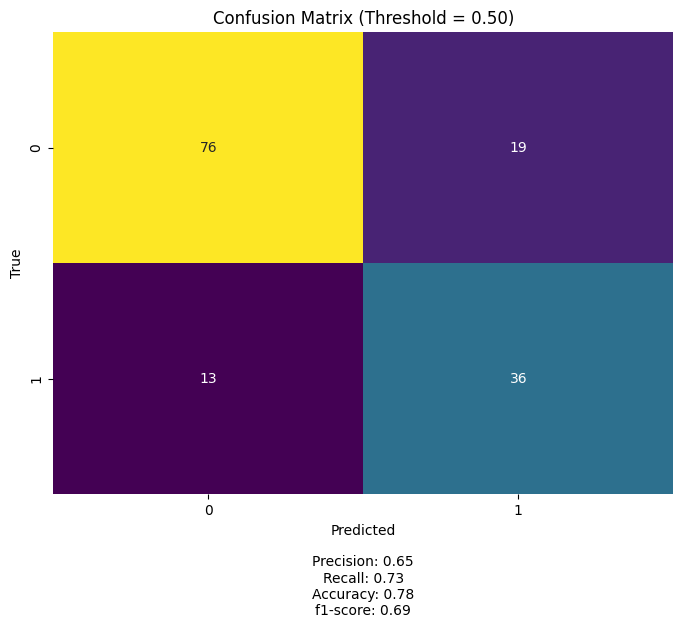

In [149]:
# Fatih calik hocamdan
def generate_confusion_matrix(threshold):
    y_pred = (y_pred_proba[:, -1] >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f_1 = f1_score(y_test, y_pred)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Threshold = {threshold:.2f})')

    # Add text below the graph
    plt.text(0.5, -0.20, f'Precision: {precision:.2f}\nRecall: {recall:.2f}\nAccuracy: {accuracy:.2f}\nf1-score: {f_1:.2f}',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.show()

# Create interactive slider
threshold_slider = FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description='Threshold')

# Create interactive widget
interactive_plot = interactive(generate_confusion_matrix, threshold=threshold_slider)

# Display the interactive widget
display(interactive_plot)

**Manuel Cross Validation icin bir kod**

In [150]:
from sklearn.model_selection import StratifiedKFold
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
        
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
        
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [151]:
model = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='liblinear')

CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      73.61%  std 6.37%
Precision-1   59.76%  std 8.11%
Recall-1      75.79%  std 11.53%
F1_score-1    66.36%  std 7.60%


# Final Model and Model Deployment

In [152]:
scaler = StandardScaler().fit(X)

In [153]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [154]:
X_scaled = scaler.transform(X)
final_model = LogisticRegression(C=0.1, class_weight = "balanced", penalty='l1', solver='liblinear').fit(X_scaled, y)

In [155]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

## New Observation

In [163]:
my_dict = {"Pregnancies": [3, 6, 5, 4, 7, 5],
           "Glucose": [117, 140, 120, 132, 155, 110],
           "BloodPressure": [72, 80, 75, 90, 98, 83],
           "SkinThickness": [23, 33, 25, 20, 28, 22],
           "Insulin": [48, 132, 55, 120, 60, 76],
           "BMI": [32, 36.5, 34, 30, 28, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45, 0.39, 0.44, 0.31],
           "Age": [29, 40, 33, 27, 34, 40]
          }

In [164]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.000,0.380,29
1,6,140,80,33,132,36.500,0.630,40
2,5,120,75,25,55,34.000,0.450,33
3,4,132,90,20,120,30.000,0.390,27
4,7,155,98,28,60,28.000,0.440,34
5,5,110,83,22,76,34.000,0.310,40


In [165]:
scaler_diabates = pickle.load(open("scaler_diabates", "rb"))

In [166]:
sample_scaled = scaler_diabates.transform(sample)
sample_scaled

array([[-0.26176089, -0.15989353, -0.04880222,  0.1107269 , -0.3129508 ,
        -0.06203757, -0.28511694, -0.3699221 ],
       [ 0.63004277,  0.59105285,  0.61417137,  0.75730737,  0.40380099,
         0.59612131,  0.46610236,  0.56790858],
       [ 0.33277488, -0.06194401,  0.19981287,  0.240043  , -0.25322148,
         0.23047749, -0.07477553, -0.02889276],
       [ 0.035507  ,  0.3298541 ,  1.44288835, -0.08324724,  0.30140787,
        -0.35455262, -0.25506816, -0.54043677],
       [ 0.92731065,  1.08080048,  2.10586194,  0.43401714, -0.21055769,
        -0.64706768, -0.10482431,  0.05636457],
       [ 0.33277488, -0.38844243,  0.86278646,  0.04606886, -0.07403354,
         0.23047749, -0.49545834,  0.56790858]])

In [167]:
final_model = pickle.load(open("final_model_diabates", "rb"))

In [168]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [169]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.48"] = predictions2
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.48
0,3,117,72,23,48,32.000,0.380,29,0.368,0,0
1,6,140,80,33,132,36.500,0.630,40,0.757,1,1
2,5,120,75,25,55,34.000,0.450,33,0.497,0,1
3,4,132,90,20,120,30.000,0.390,27,0.468,0,0
4,7,155,98,28,60,28.000,0.440,34,0.706,1,1
5,5,110,83,22,76,34.000,0.310,40,0.414,0,0
